## Исследование данных Хакатона Озон

2017, Александр Дьяконов

In [2]:
# подгружаем все нужные пакеты
import pandas as pd
import numpy as np


# для встроенных картинок
%pylab inline
# чуть покрасивше картинки:
pd.set_option('display.mpl_style', 'default')
figsize(12, 9)

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['figure.figsize'] = 10, 7.5
#plt.rcParams['axes.grid'] = True
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Ubuntu'

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

# чтобы был русский шрифт
from matplotlib import rc
 
font = {'family': 'Droid Sans',
        'weight': 'normal'}
rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# чтобы был русский шрифт
# from matplotlib import rc
 
# font = {'family': 'Helvetica',
#         'weight': 'normal'}
# rc('font', **font)

# загрузка данных

In [2]:
data = pd.read_excel('Training Part.xlsx')
day1 = pd.read_excel('day1.xlsx')
day2 = pd.read_excel('day2.xlsx')

In [3]:
print (data.shape, day1.shape, day2.shape)

((390000, 197), (130000, 197), (132016, 197))


In [3]:
# если созданы csv-файлы
data = pd.read_csv('data.csv')
day1 = pd.read_csv('day1.csv')
day2 = pd.read_csv('day2.csv')

In [4]:
print (data.shape, day1.shape, day2.shape)

(390000, 197) (130000, 197) (132016, 197)


In [4]:
print (data.columns)

Index([u'ID', u'NetSales', u'gender', u'ActivityIndex', u'Alcohol',
       u'AverageFriendsRegMonthDelta', u'CanSeeAllPosts',
       u'CanSeeAllPosts_CanPost', u'EducationType', u'EducationType_VK',
       ...
       u'TD_TV', u'TD_ukraine', u'TD_video', u'TD_way_of_life',
       u'TD_wedding_communities', u'TD_women_communities', u'TD_workout',
       u'TD_youth_communities', u'TD_sum', u'animal_owner'],
      dtype='object', length=197)


In [8]:
day1.columns

Index(['ID', 'NetSales', 'gender', 'ActivityIndex', 'Alcohol',
       'AverageFriendsRegMonthDelta', 'CanSeeAllPosts',
       'CanSeeAllPosts_CanPost', 'EducationType', 'EducationType_VK',
       ...
       'TD_TV', 'TD_ukraine', 'TD_video', 'TD_way_of_life',
       'TD_wedding_communities', 'TD_women_communities', 'TD_workout',
       'TD_youth_communities', 'TD_sum', 'animal_owner'],
      dtype='object', length=197)

In [5]:
data[:2]

,ID,NetSales,gender,ActivityIndex,Alcohol,AverageFriendsRegMonthDelta,CanSeeAllPosts,CanSeeAllPosts_CanPost,EducationType,EducationType_VK,FriendsAverageDeletedAccounts,FriendsAverageHasHighSchools,FriendsAverageHasJobs,FriendsPerDay,HasPhone,HasSkype,HasTwitter,LastActivity,LifeTime,MaxRegDate,MinRegDate,MobileUsageAll,MobileUsageAndroid,MobileUsageIPad,MobileUsageIphone,MobileUsageWinPhone,MonthsFromMaxRegDate,MonthsFromMinRegDate,NumberOfAccounts,NumberOfAccountsMOIMIR,NumberOfAccountsODKL,NumberOfAccountsVK,NumberOfAdvancedSchools,NumberOfChilds,NumberOfChilds_VK,NumberOfCompanies,NumberOfDeletedAccounts,NumberOfDeletedAccounts_VK,NumberOfEntrance,NumberOfFollowers,NumberOfFriendsMax,NumberOfFriendsMax_VK,NumberOfFriendsMin,NumberOfFriendsSum,NumberOfGroupsMax,NumberOfGroupsSum_OK,NumberOfHighSchools,NumberOfNotesMax,NumberOfPhotosMax,NumberOfPhotosMin_VK,NumberOfPrivateAccounts,NumberOfPrivateAccounts_OK,NumberOfRelatives,NumberOfRelatives_OK,NumberOfSchools,NumberOfSubscriptions,NumberOfVideos,Relation,SaScore1,SaScore2,SaScore5,SaScore6,SaScore7,SaScoreFraud,SaScoreSocial,Smoking,UseScreenName,Worldviews,YearsSinceMinRegDate,YearsSinceMinRegDate_OK,YearsSinceMinRegDate_VK,NumberOfAccountsFB,Interest_1,Interest_2,Interest_3,Interest_4,Interest_5,Interest_6,Interest_7,Interest_8,Interest_9,Interest_10,Interest_11,Interest_12,Interest_13,Interest_14,Interest_15,Interest_16,Interest_17,Interest_18,Interest_19,Interest_20,Interest_21,Interest_22,Interest_23,Interest_24,Interest_25,TD_acquaint_communic,TD_acquaintances,TD_active_rest,TD_ad,TD_animals,TD_anime_hentai,TD_architecture,TD_art_design,TD_beautiful_girls,TD_beauty,TD_books,TD_business,TD_cars,TD_cartoons,TD_caucasian,TD_celebrities,TD_children,TD_cognitive,TD_companies,TD_computers,TD_cookery,TD_design,TD_design_renovation,TD_diets,TD_do_yourself,TD_electronics_electrappliances,TD_entertainment,TD_family_home,TD_fashion,TD_finance,TD_fitness,TD_football,TD_foreign_lang,TD_gadgets,TD_games,TD_geopolitics_economy,TD_gif,TD_goods_services,TD_hobbies,TD_horoscope,TD_horror,TD_humour,TD_images,TD_insurance,TD_interior,TD_kazakhstan,TD_landscape_design,TD_literature_poetry,TD_mass_media,TD_mass_media_ad_PR,TD_men_communities,TD_mobile_internet,TD_motivation,TD_moto,TD_movies,TD_music,TD_names,TD_nature,TD_nature_and_travel,TD_nostalgia,TD_other_services,TD_parents_communities,TD_philosophy_esoterics,TD_photo,TD_poetry,TD_politics,TD_professions,TD_proposed_news,TD_real_estate,TD_regional_communities,TD_relations,TD_religion,TD_rest,TD_russia,TD_science,TD_science_education,TD_shops,TD_slimming,TD_society,TD_soft,TD_softporno_porno,TD_sport_and_health,TD_sport_diet,TD_sport_other,TD_start_ups,TD_tech_IT,TD_technologies,TD_thoughts_ideas,TD_tourism,TD_travel,TD_TV,TD_ukraine,TD_video,TD_way_of_life,TD_wedding_communities,TD_women_communities,TD_workout,TD_youth_communities,TD_sum,animal_owner
0,1,0,F,-,0,92,-,-,12,-,0.06667,0.33333,0.06667,0.01768,0,0,0,113,2623,2012-10-19 00:00:00,2008-01-20 00:00:00,-,-,-,-,-,51,108,2,0,2,0,0,0,-,0,0,-,-,-,14,-,1,15,-,-,1,0,1,-,0,0,4,4,1,-,-,0,-3.82756,-1.67380,-5.15525,-6.52538,113,-4.14635,-4.86583,0,0,0,9.0197,9.0197,-,NaN,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,0,F,-,0,-,-,-,-,-,0,0.33333,0.22222,-,0,0,0,79,-,2008-06-22 00:00:00,2008-06-22 00:00:00,-,-,-,-,-,103,103,1,1,0,0,0,0,-,0,0,-,-,-,8,-,8,8,-,-,0,-,4,-,1,-,0,-,0,-,-,0,-4.06040,-1.92671,-4.93723,-6.52939,110,-3.98769,-5.21042,0,0,0,8.59808,-,-,NaN,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
day1[:3]

,ID,NetSales,gender,ActivityIndex,Alcohol,AverageFriendsRegMonthDelta,CanSeeAllPosts,CanSeeAllPosts_CanPost,EducationType,EducationType_VK,FriendsAverageDeletedAccounts,FriendsAverageHasHighSchools,FriendsAverageHasJobs,FriendsPerDay,HasPhone,HasSkype,HasTwitter,LastActivity,LifeTime,MaxRegDate,MinRegDate,MobileUsageAll,MobileUsageAndroid,MobileUsageIPad,MobileUsageIphone,MobileUsageWinPhone,MonthsFromMaxRegDate,MonthsFromMinRegDate,NumberOfAccounts,NumberOfAccountsMOIMIR,NumberOfAccountsODKL,NumberOfAccountsVK,NumberOfAdvancedSchools,NumberOfChilds,NumberOfChilds_VK,NumberOfCompanies,NumberOfDeletedAccounts,NumberOfDeletedAccounts_VK,NumberOfEntrance,NumberOfFollowers,NumberOfFriendsMax,NumberOfFriendsMax_VK,NumberOfFriendsMin,NumberOfFriendsSum,NumberOfGroupsMax,NumberOfGroupsSum_OK,NumberOfHighSchools,NumberOfNotesMax,NumberOfPhotosMax,NumberOfPhotosMin_VK,NumberOfPrivateAccounts,NumberOfPrivateAccounts_OK,NumberOfRelatives,NumberOfRelatives_OK,NumberOfSchools,NumberOfSubscriptions,NumberOfVideos,Relation,SaScore1,SaScore2,SaScore5,SaScore6,SaScore7,SaScoreFraud,SaScoreSocial,Smoking,UseScreenName,Worldviews,YearsSinceMinRegDate,YearsSinceMinRegDate_OK,YearsSinceMinRegDate_VK,NumberOfAccountsFB,Interest_1,Interest_2,Interest_3,Interest_4,Interest_5,Interest_6,Interest_7,Interest_8,Interest_9,Interest_10,Interest_11,Interest_12,Interest_13,Interest_14,Interest_15,Interest_16,Interest_17,Interest_18,Interest_19,Interest_20,Interest_21,Interest_22,Interest_23,Interest_24,Interest_25,TD_acquaint_communic,TD_acquaintances,TD_active_rest,TD_ad,TD_animals,TD_anime_hentai,TD_architecture,TD_art_design,TD_beautiful_girls,TD_beauty,TD_books,TD_business,TD_cars,TD_cartoons,TD_caucasian,TD_celebrities,TD_children,TD_cognitive,TD_companies,TD_computers,TD_cookery,TD_design,TD_design_renovation,TD_diets,TD_do_yourself,TD_electronics_electrappliances,TD_entertainment,TD_family_home,TD_fashion,TD_finance,TD_fitness,TD_football,TD_foreign_lang,TD_gadgets,TD_games,TD_geopolitics_economy,TD_gif,TD_goods_services,TD_hobbies,TD_horoscope,TD_horror,TD_humour,TD_images,TD_insurance,TD_interior,TD_kazakhstan,TD_landscape_design,TD_literature_poetry,TD_mass_media,TD_mass_media_ad_PR,TD_men_communities,TD_mobile_internet,TD_motivation,TD_moto,TD_movies,TD_music,TD_names,TD_nature,TD_nature_and_travel,TD_nostalgia,TD_other_services,TD_parents_communities,TD_philosophy_esoterics,TD_photo,TD_poetry,TD_politics,TD_professions,TD_proposed_news,TD_real_estate,TD_regional_communities,TD_relations,TD_religion,TD_rest,TD_russia,TD_science,TD_science_education,TD_shops,TD_slimming,TD_society,TD_soft,TD_softporno_porno,TD_sport_and_health,TD_sport_diet,TD_sport_other,TD_start_ups,TD_tech_IT,TD_technologies,TD_thoughts_ideas,TD_tourism,TD_travel,TD_TV,TD_ukraine,TD_video,TD_way_of_life,TD_wedding_communities,TD_women_communities,TD_workout,TD_youth_communities,TD_sum,animal_owner
0,390004,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,390010,NaN,NaN,4.5,0,60,1,1,-,-,0.04138,0.18506,0.07356,0.14374,1,0,0,1,2261,2014-03-12 00:00:00,2009-06-30 00:00:00,0.95402,0.91429,0,0.59036,0,34,91,7,1,3,3,0,0,0,0,0,0,151,2,270,111,0,826,12,12,0,79,20,1,1,1,16,28,2,6,-,6,-1.90297,-1.72063,-3.57124,-5.0395,155,-2.39785,-2.97663,0,1,0,7.5767,7.57379,7.5767,1

In [7]:
day2[:3]

,ID,Net Sales,gender,ActivityIndex,Alcohol,AverageFriendsRegMonthDelta,CanSeeAllPosts,CanSeeAllPosts_CanPost,EducationType,EducationType_VK,FriendsAverageDeletedAccounts,FriendsAverageHasHighSchools,FriendsAverageHasJobs,FriendsPerDay,HasPhone,HasSkype,HasTwitter,LastActivity,LifeTime,MaxRegDate,MinRegDate,MobileUsageAll,MobileUsageAndroid,MobileUsageIPad,MobileUsageIphone,MobileUsageWinPhone,MonthsFromMaxRegDate,MonthsFromMinRegDate,NumberOfAccounts,NumberOfAccountsMOIMIR,NumberOfAccountsODKL,NumberOfAccountsVK,NumberOfAdvancedSchools,NumberOfChilds,NumberOfChilds_VK,NumberOfCompanies,NumberOfDeletedAccounts,NumberOfDeletedAccounts_VK,NumberOfEntrance,NumberOfFollowers,NumberOfFriendsMax,NumberOfFriendsMax_VK,NumberOfFriendsMin,NumberOfFriendsSum,NumberOfGroupsMax,NumberOfGroupsSum_OK,NumberOfHighSchools,NumberOfNotesMax,NumberOfPhotosMax,NumberOfPhotosMin_VK,NumberOfPrivateAccounts,NumberOfPrivateAccounts_OK,NumberOfRelatives,NumberOfRelatives_OK,NumberOfSchools,NumberOfSubscriptions,NumberOfVideos,Relation,SaScore1,SaScore2,SaScore5,SaScore6,SaScore7,SaScoreFraud,SaScoreSocial,Smoking,UseScreenName,Worldviews,YearsSinceMinRegDate,YearsSinceMinRegDate_OK,YearsSinceMinRegDate_VK,NumberOfAccountsFB,Interest_1,Interest_2,Interest_3,Interest_4,Interest_5,Interest_6,Interest_7,Interest_8,Interest_9,Interest_10,Interest_11,Interest_12,Interest_13,Interest_14,Interest_15,Interest_16,Interest_17,Interest_18,Interest_19,Interest_20,Interest_21,Interest_22,Interest_23,Interest_24,Interest_25,TD_acquaint_communic,TD_acquaintances,TD_active_rest,TD_ad,TD_animals,TD_anime_hentai,TD_architecture,TD_art_design,TD_beautiful_girls,TD_beauty,TD_books,TD_business,TD_cars,TD_cartoons,TD_caucasian,TD_celebrities,TD_children,TD_cognitive,TD_companies,TD_computers,TD_cookery,TD_design,TD_design_renovation,TD_diets,TD_do_yourself,TD_electronics_electrappliances,TD_entertainment,TD_family_home,TD_fashion,TD_finance,TD_fitness,TD_football,TD_foreign_lang,TD_gadgets,TD_games,TD_geopolitics_economy,TD_gif,TD_goods_services,TD_hobbies,TD_horoscope,TD_horror,TD_humour,TD_images,TD_insurance,TD_interior,TD_kazakhstan,TD_landscape_design,TD_literature_poetry,TD_mass_media,TD_mass_media_ad_PR,TD_men_communities,TD_mobile_internet,TD_motivation,TD_moto,TD_movies,TD_music,TD_names,TD_nature,TD_nature_and_travel,TD_nostalgia,TD_other_services,TD_parents_communities,TD_philosophy_esoterics,TD_photo,TD_poetry,TD_politics,TD_professions,TD_proposed_news,TD_real_estate,TD_regional_communities,TD_relations,TD_religion,TD_rest,TD_russia,TD_science,TD_science_education,TD_shops,TD_slimming,TD_society,TD_soft,TD_softporno_porno,TD_sport_and_health,TD_sport_diet,TD_sport_other,TD_start_ups,TD_tech_IT,TD_technologies,TD_thoughts_ideas,TD_tourism,TD_travel,TD_TV,TD_ukraine,TD_video,TD_way_of_life,TD_wedding_communities,TD_women_communities,TD_workout,TD_youth_communities,TD_sum,animal_owner
0,520001,NaN,M,0.9,0,78,1,2,0,0,0,0.24,0.12,0.00338,0,0,0,1,1478,2011-08-23 00:00:00,2008-12-25 00:00:00,0.75,1,0,0,0,65,97,2,1,0,1,0,0,0,0,0,0,3,1,18,5,5,23,9,-,1,-,4,1,0,-,0,-,1,6,8,7,-4.07950,-2.42172,-4.79584,-6.03038,121,-3.95212,-4.19340,0,1,0,8.08853,-,5.42952,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.133333,0,0,0,0.133333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.133333,0,0,0,0,0,0,0,0,0,0.133333,0,0,0,0,0,0,0,0,0,0.066667,0,0,0,0,0,0,0,0,0,0,0,0,0.066667,0,0,0,0,0,0,0,0,0,0,0.066667,0,0,0,0,0,0,0.066667,0,0,0,0.2,15,0
1,520007,NaN,M,-,2,92,1,2,0,0,0.09053,0.39506,0.16049,0.33846,0,0,0,39,2288,2012-01-10 00:00:00,2009-03-02 00:00:00,0,0,0,0,0,60,94,3,1,1,1,0,0,0,1,0,0,-,6,209,22,3,234,19,16,1,10,14,4,0,0,3,3,2,-,6,7,-3.57355,-1.58798,-4.35452,-5.16231,132,-4.28645,-4.61878,2,0,1,7.90421,7.90421,5.04392,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
# чтобы создать csv-файлы
data.to_csv('data.csv', index=False)
day1.to_csv('day1.csv', index=False)
day2.to_csv('day2.csv', index=False)

# целевой признак

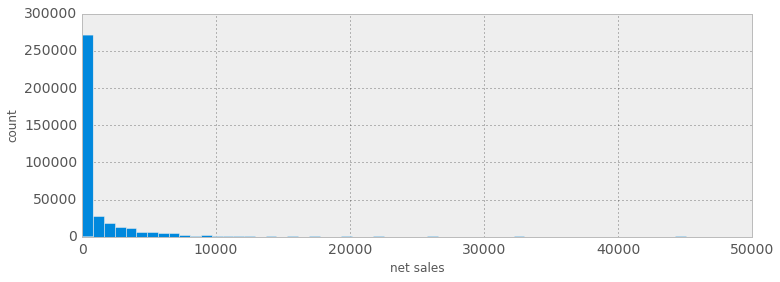

In [11]:
figsize(12, 4)
plt.hist(data.NetSales.values, bins=100, color='#0088DD')
plt.xlim([0, 50000])
plt.xlabel('net sales')
plt.ylabel('count')

In [6]:
# число нулевых и больших значений
np.mean(data.NetSales.values==0), np.mean(data.NetSales.values > 10000)

(0.62155897435897434, 0.048105128205128203)

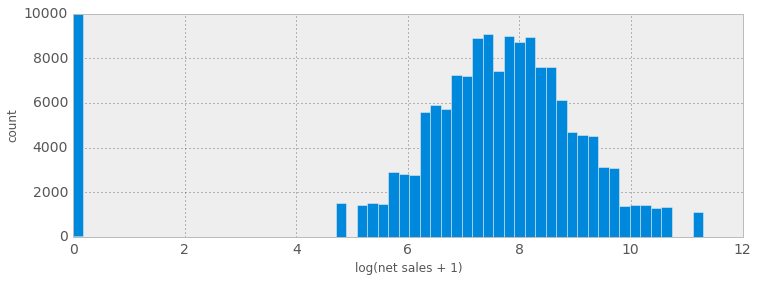

In [20]:
# после логарифмирования целевого признака
figsize(12, 4)
plt.hist(np.log(data.NetSales.values + 1.0), bins=60, color='#0088DD')
plt.ylim([0, 10000])
plt.xlabel('log(net sales + 1)')
plt.ylabel('count')

#### вывод:
лучше логарифмировать

## работа с пропусками + новый признак

In [5]:
from time import time

def make_feature_matrix(data):
    tm = time()
    
    data.fillna(-2, inplace=True)
    data.replace('-', -1, inplace=True)
    data.gender = data.gender.map({'F': -1, 'M': +1, -2: 0})
    data.MaxRegDate = pd.to_datetime(data.MaxRegDate.replace(-1, datetime.datetime(2010, 6, 6, 0, 0)).replace(-2, datetime.datetime(2009, 7, 7, 0, 0)))
    data.MinRegDate = pd.to_datetime(data.MinRegDate.replace(-1, datetime.datetime(2010, 6, 6, 0, 0)).replace(-2, datetime.datetime(2009, 7, 7, 0, 0)))
    # print (tmp.max()) # Timestamp('2015-09-08 00:00:00') 2015-08-17 00:00:00
    # print (tmp.min()) # Timestamp('2006-03-06 00:00:00') 2006-03-04 00:00:00
    data.deltatime = data.MaxRegDate - data.MinRegDate
    data.deltatime = data.deltatime.dt.total_seconds() /(60*60*24)
    data.MaxRegDate = (data.MaxRegDate - pd.to_datetime('2006-01-01T00:00:00.000000000')).dt.total_seconds() /(60*60*24)
    data.MinRegDate = (data.MinRegDate - pd.to_datetime('2006-01-01T00:00:00.000000000')).dt.total_seconds() /(60*60*24)
    
    data = data.astype(float)
    
    print ('time = ' + str(time() - tm))
    return (data)

In [6]:
data = make_feature_matrix(data)

time = 9.350315570831299


In [7]:
day1 = make_feature_matrix(day1)
day2 = make_feature_matrix(day2)

time = 2.025214433670044
time = 2.039580821990967


## Визуализации

In [8]:
# СРАЗУ логарифмируем
data.NetSales = np.log(data.NetSales.values + 1)

### признаки со своими значениями

In [10]:
for name in data.columns:
    tmp = data[name].unique()
    n = len(tmp)
    if n > 5:
        tmp = tmp[:5]
    print (name, n, tmp)

ID 390000 [  1.   7.  13.  19.  25.]
NetSales 101 [ 0.          5.19849703  8.49236757  8.14118979  8.65538869]
gender 3 [-1.  1.  0.]
ActivityIndex 890 [-1.    4.58  5.74  4.75  4.13]
Alcohol 7 [ 0. -2.  4.  3.  2.]
AverageFriendsRegMonthDelta 115 [ 92.  -1.  96.  89.  97.]
CanSeeAllPosts 4 [-1.  0.  1. -2.]
CanSeeAllPosts_CanPost 5 [-1.  1.  2. -2.  0.]
EducationType 15 [ 12.  -1.   0.  10.   7.]
EducationType_VK 14 [ -1.   0.  -2.  13.   7.]
FriendsAverageDeletedAccounts 12159 [ 0.06667  0.       0.11579  0.02691  0.01754]
FriendsAverageHasHighSchools 35096 [ 0.33333  0.45263  0.72197  0.625    0.08434]
FriendsAverageHasJobs 24591 [ 0.06667  0.22222  0.06316  0.10762  0.33114]
FriendsPerDay 32199 [ 0.01768 -1.       0.03699  0.07254  0.15117]
HasPhone 3 [ 0. -2.  1.]
HasSkype 3 [ 0.  1. -2.]
HasTwitter 3 [ 0. -2.  1.]
LastActivity 2324 [ 113.   79.  145.    3.    0.]
LifeTime 3396 [  2.62300000e+03  -1.00000000e+00   2.51400000e+03   2.57800000e+03
   2.78500000e+03]
MaxRegDate 3422

### исследование отдельных признаков

Alcohol
-2.0     97362
 0.0    281298
 1.0      1584
 2.0      2485
 3.0      3695
 4.0      3025
 5.0       551
Name: NetSales, dtype: int64


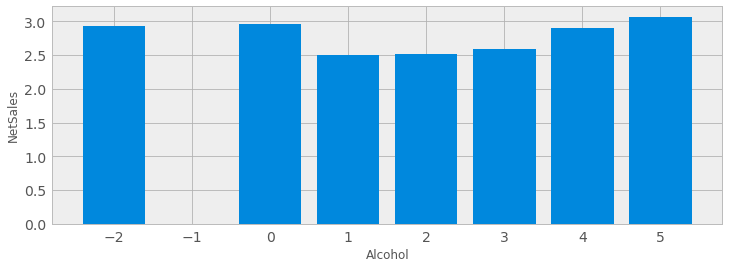

In [12]:
name = 'Alcohol'
figsize(12, 4)
print (data.groupby(name)['NetSales'].count())
tmp = data.groupby(name)['NetSales'].mean()
plt.bar(tmp.index, tmp, color='#0088DD')
plt.xlabel(name)
plt.ylabel('NetSales')

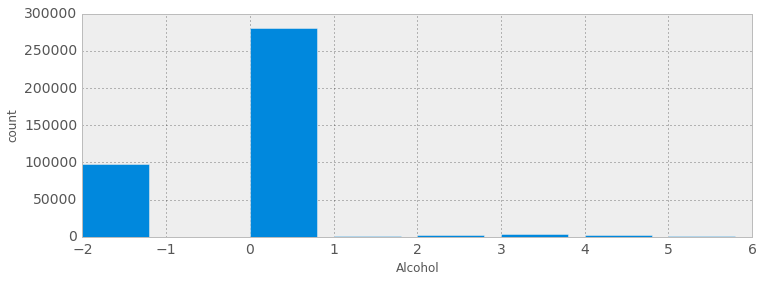

In [32]:
name = 'Alcohol'
tmp = data.groupby(name)['NetSales'].count()
plt.bar(tmp.index, tmp, color='#0088DD')
plt.xlabel(name)
plt.ylabel('count')

In [34]:
# как всегда много неизвестных значений
(data[name]<=0).mean()

0.97092307692307689

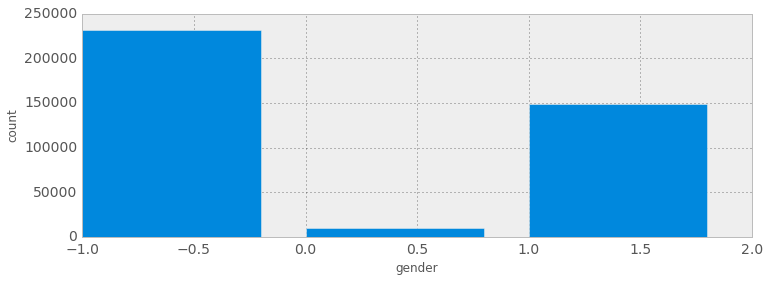

In [37]:
name = 'gender'
tmp = data.groupby(name)['NetSales'].count()
plt.bar(tmp.index, tmp, color='#0088DD')
plt.xlabel(name)
plt.ylabel('count')

gender
-1.0    231186
 0.0      9800
 1.0    149014
Name: NetSales, dtype: int64


([<matplotlib.axis.XTick at 0x7f806e94e390>,
 <a list of 3 Text xticklabel objects>)

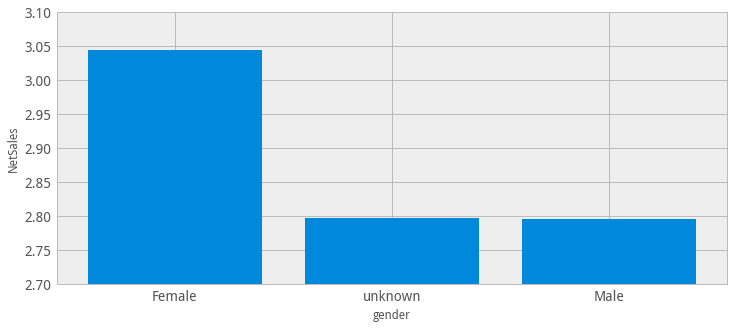

In [15]:
name = 'gender'
plt.figure(figsize=(12, 5))
print (data.groupby(name)['NetSales'].count())
tmp = data.groupby(name)['NetSales'].mean()
plt.bar(tmp.index, tmp, color='#0088DD')
plt.xlabel(name)
plt.ylabel('NetSales')
plt.ylim([2.7, 3.1])
plt.xticks([-1.0, 0.0, 1.0], [u'Female', u'unknown', u'Male'])

CanSeeAllPosts
-2     97362
-1    149089
 0     61687
 1     81862
Name: NetSales, dtype: int64


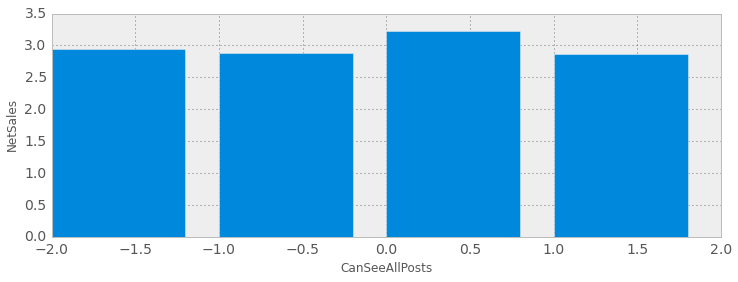

In [55]:
name = 'CanSeeAllPosts'
print (data.groupby(name)['NetSales'].count())
tmp = data.groupby(name)['NetSales'].mean()
plt.bar(tmp.index, tmp, color='#0088DD')
plt.xlabel(name)
plt.ylabel('NetSales')
# plt.xticks([-0.6, 0.4, 1.4], [u'Female', u'unknown', u'Male'])


In [65]:
(data.CanSeeAllPosts<0).mean()

0.63192564102564097

In [66]:
data.EducationType.unique()

array([ 12.,  -1.,   0.,  10.,   7.,  13.,   6.,  -2.,   5.,   9.,   8.,
        11.,   4.,   3.,   2.])

EducationType
-2      97362
-1     129559
 0      38562
 2        331
 3       4023
 4       1194
 5       9283
 6       6405
 7      15624
 8       7223
 9      10893
 10     12541
 11      5246
 12     12093
 13     39661
Name: NetSales, dtype: int64


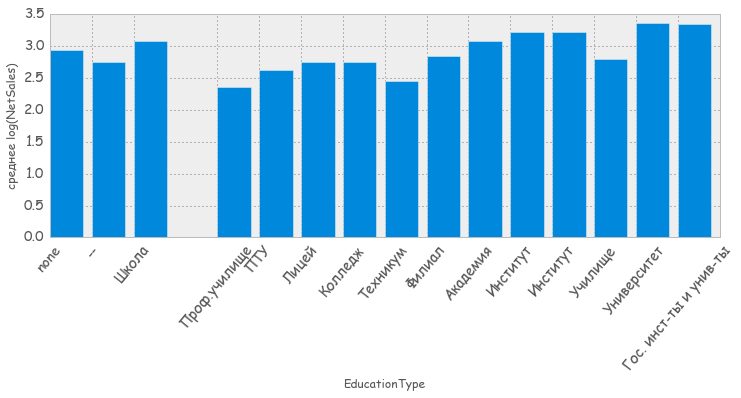

In [67]:
plt.figure(figsize=(12, 4))
name = 'EducationType'
print (data.groupby(name)['NetSales'].count())
tmp = data.groupby(name)['NetSales'].mean()
plt.bar(tmp.index, tmp, color='#0088DD')
plt.xlabel(name)
plt.ylabel(u'среднее log(NetSales)') # NetSales
plt.xticks([-2,-1,0, 2,3,4,5,6,7,8,9,10,11,12,13], [u'none',u'--',u'Школа', u'Проф.училище', u'ПТУ', u'Лицей',
                                                   u'Колледж', u'Техникум', u'Филиал', u'Академия',
                                                   u'Институт', u'Институт', u'Училище', u'Университет',
                                                   u'Гос. инст-ты и унив-ты'], rotation=50)
plt.show()

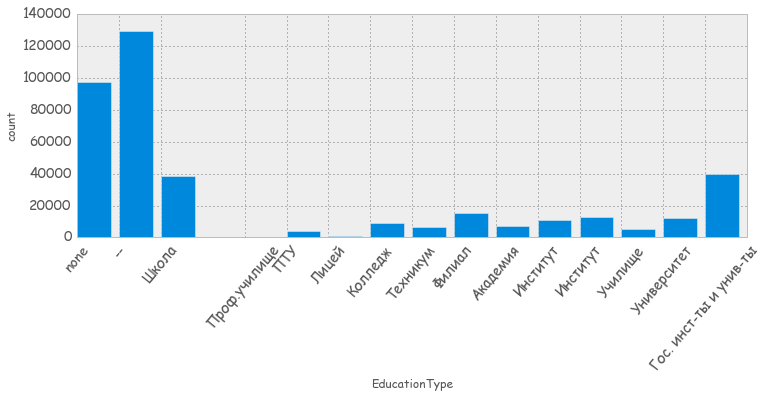

In [69]:
name = 'EducationType'

plt.figure(figsize=(12, 4))

tmp = data.groupby(name)['NetSales'].count()
plt.bar(tmp.index, tmp, color='#0088DD')
plt.xlabel(name)
plt.ylabel('count')

# plt.xticks([-0.6, 0.4, 1.4], [u'Female', u'unknown', u'Male'])
plt.xticks([-2,-1,0, 2,3,4,5,6,7,8,9,10,11,12,13], [u'none',u'--',u'Школа', u'Проф.училище', u'ПТУ', u'Лицей',
                                                   u'Колледж', u'Техникум', u'Филиал', u'Академия',
                                                   u'Институт', u'Институт', u'Училище', u'Университет',
                                                   u'Гос. инст-ты и унив-ты'], rotation=50)
plt.show()



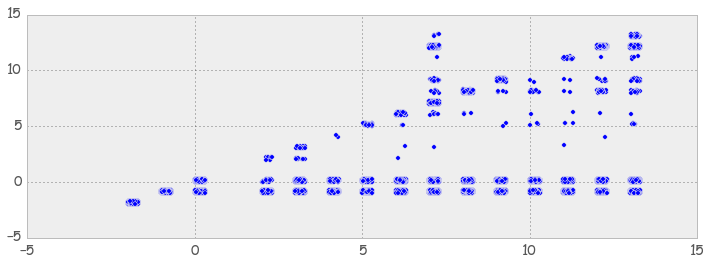

In [71]:
e1 = 0.3*np.random.rand(data.shape[0])
e2 = 0.3*np.random.rand(data.shape[0])
plt.scatter(data.EducationType.values + e1, data.EducationType_VK.values + e2)

In [74]:
data.groupby(['EducationType', 'EducationType_VK'])['NetSales'].count().unstack()

EducationType_VK,-2.0,-1.0,0.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,11.0,12.0,13.0
EducationType,,,,,,,,,,,,,,
-2,97362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1,NaN,129559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,3205,35357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,301,23,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3759,242,7,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1077,115,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,7801,1450,NaN,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,5659,704,1,1,NaN,2,38,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,7971,5028,NaN,1,NaN,NaN,7,2349,6,19,1,238,4


In [87]:
data.groupby(['HasPhone', 'HasSkype', 'HasTwitter'])['NetSales'].agg({'mean': np.mean, 'count': lambda x: x.count()}) #.unstack()

count      mean
HasPhone HasSkype HasTwitter                  
-2       -2       -2           97362  2.937212
 0        0        0          253128  2.994881
                   1            1312  2.807146
          1        0           16811  2.872637
                   1            1589  2.796710
 1        0        0           11847  2.460538
                   1             246  2.337781
          1        0            6959  2.276721
                   1             746  2.445111

In [76]:
data.groupby(['HasPhone', 'HasSkype', 'HasTwitter'])['NetSales'].mean() #.unstack()

HasPhone  HasSkype  HasTwitter
-2        -2        -2            2.937212
 0         0         0            2.994881
                     1            2.807146
           1         0            2.872637
                     1            2.796710
 1         0         0            2.460538
                     1            2.337781
           1         0            2.276721
                     1            2.445111
Name: NetSales, dtype: float64

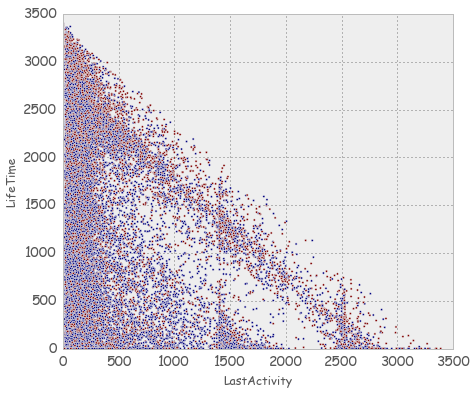

In [91]:
plt.figure(figsize=(7,6))
plt.scatter(data.LastActivity, data.LifeTime, 5, data.NetSales > 0)
plt.xlim([-2.5, 3500])
plt.ylim([-2.5, 3500])
plt.xlabel('LastActivity')
plt.ylabel('LifeTime')

In [ ]:
#data.groupby(['MobileUsageAndroid', 'MobileUsageIPad', 'MobileUsageIphone'])['NetSales'].agg({'mean': np.mean, 'count': lambda x: x.count()}) #.unstack()
plt.figure(figsize=(7,6))
plt.scatter(data.MobileUsageAndroid, data.MobileUsageIphone, 5, data.NetSales > 0)
plt.xlim([-0.001, 1.001])
plt.ylim([-0.001, 1.001])
plt.xlabel('MobileUsageAndroid')
plt.ylabel('MobileUsageIphone')

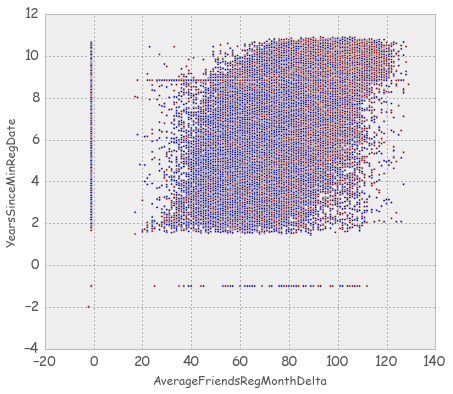

In [45]:
# самые важные признаки
plt.figure(figsize=(7,6))
plt.scatter(data.AverageFriendsRegMonthDelta.values, data.YearsSinceMinRegDate.values, 5, data.NetSales.values > 0)
# plt.xlim([-2.5, 3500])
# plt.ylim([-2.5, 3500])
plt.xlabel('AverageFriendsRegMonthDelta')
plt.ylabel('YearsSinceMinRegDate')



In [55]:
np.mean(data.NetSales.values[data.AverageFriendsRegMonthDelta.values > 65])

3.113393404629742

In [58]:
np.mean(data.NetSales.values[data.AverageFriendsRegMonthDelta.values <= 65])

2.7461372315894477

In [57]:
np.mean(data.NetSales.values[data.YearsSinceMinRegDate.values > 6])

3.1016901085295796

In [60]:
np.mean(data.NetSales.values[data.YearsSinceMinRegDate.values <= 6])

2.681165505975696

In [ ]:
# самые важные признаки
plt.figure(figsize=(7,6))
plt.scatter(data.AverageFriendsRegMonthDelta.values, data.YearsSinceMinRegDate.values, 5, data.NetSales.values > 0)
# plt.xlim([-2.5, 3500])
# plt.ylim([-2.5, 3500])
plt.xlabel('AverageFriendsRegMonthDelta')
plt.ylabel('YearsSinceMinRegDate')


In [ ]:

u'', u'MinRegDate', u'MonthsFromMinRegDate',
       u''

In [44]:
np.mean(data.MobileUsageAndroid < 0)

0.6480948717948718

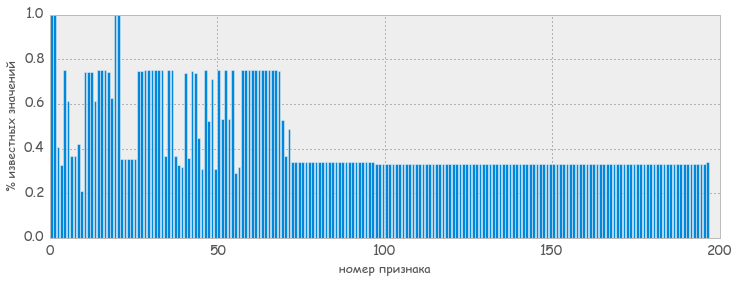

In [35]:
n_nans = ((data!=-1) & (data!=-2)).mean(0)
plt.figure(figsize=(12, 4))
plt.bar(np.arange(len(n_nans)), n_nans, color='#0088DD')
plt.xlabel(u'номер признака')
plt.ylabel(u'% известных значений')

In [39]:
n_nans[n_nans < 0.3]

NetSales                 0.000000
EducationType_VK         0.207285
NumberOfSubscriptions    0.288723
dtype: float64

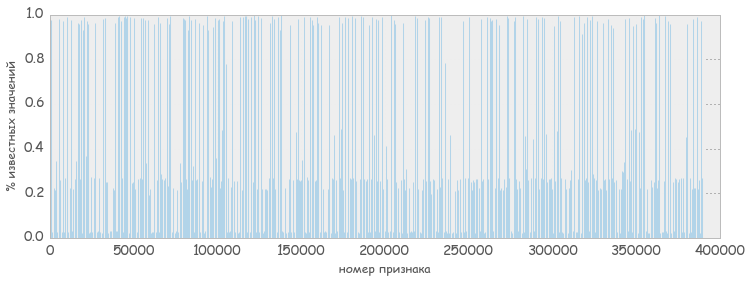

In [40]:
n_nans = ((data!=-1) & (data!=-2)).mean(1)
plt.figure(figsize=(12, 4))
plt.bar(np.arange(len(n_nans)), n_nans, color='#0088DD')
plt.xlabel(u'номер признака')
plt.ylabel(u'% известных значений')

### Исследование алгоритмов

In [16]:
X = data.drop(['ID', 'NetSales'], 1)
y = data.NetSales.values

In [22]:
print (data.shape, X.shape, y.shape)

(390000, 197) (390000, 195) (390000,)


In [23]:
from scipy.integrate import trapz, simps

def hackathone_metric(df, do_draw=True):
    '''На фход подается словарь с ответами алгоритма(поле pred) 
    и фактическими значениями(поле test):
    df = {'pred': [2,3,55,63,1,2,100,100,10],'test': [1,2,3,4,5,0,99,121,14]}
    '''

    # Сортируем фактические продажи по возрастанию и считаем кумулятивную сумму – это нижняя линия
    n = range(1, len(df['test'])+1)
    c1 = np.cumsum(sorted(df['test'], reverse=False))

    # Сортируем фактические продажи по убыванию и считаем кумулятивную сумму – это верхняя линия
    c2 = np.cumsum(sorted(df['test'], reverse=True))

    # Площадь от верхней линии к нижней линии
    s1 = simps(c2, n) - simps(c1, n)

    # Теперь берём пары предсказаний и фактических продаж
    # Сортируем по возрастанию прогнозного значения
    c3 = np.cumsum(list(zip(*sorted(zip(df['pred'],df['test']), key=lambda x: x[0])))[1])
    s2 = simps(c3, n) -  simps(c1, n)
    
    if do_draw:
        plt.plot(n,c1, label='Lower Line')
        plt.plot(n,c2, label='Upper Line')
        plt.plot(n,c3, label='Actual Line')
        plt.legend()

    return (1-s2/s1)

In [32]:
# случайные разбиения выборки на фолды
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, shuffle=True, random_state=10)

45.27469348907471
Metric:  0.620268307369


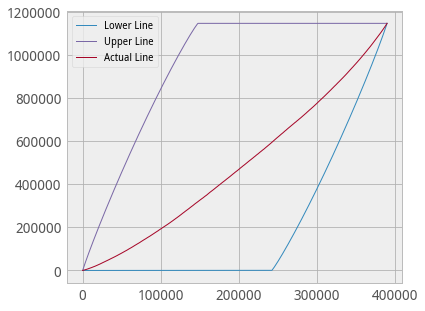

In [24]:
import lightgbm as lgb
from time import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


tm = time()
# cv = 5

# оптимизированный
clf = lgb.LGBMRegressor(learning_rate=0.06, n_estimators=50, nthread=-1, colsample_bytree=0.7, max_depth=8, min_child_samples=76, num_leaves=46)

cvp = cross_val_predict(estimator=clf, X=X, y=y, n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

# learning_rate=0.06, n_estimators=50

figsize(6, 5)
df = {'pred': cvp,'test': y}
print ("Metric: ", hackathone_metric(df))

# 0.620036885673 - 0.620268307369

47.005587577819824
Metric:  0.62094301361


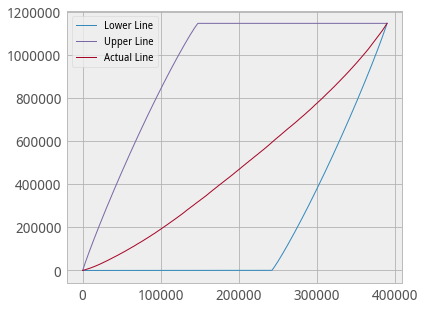

In [50]:
tm = time()
# cv = 5

# параметры по умолчанию
clf = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=50, nthread=-1)

a_lgb = cross_val_predict(estimator=clf, X=X, y=y, n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

figsize(6, 5)
df = {'pred': a_lgb,'test': y}
print ("Metric: ", hackathone_metric(df))
# 0.612690125729
# 0.614893275397
# 0.618805261162
# 0.621053597456 learning_rate=0.1

# 0.620026516158 - 0.62094301361

25.263100385665894
Metric:  0.618768309225


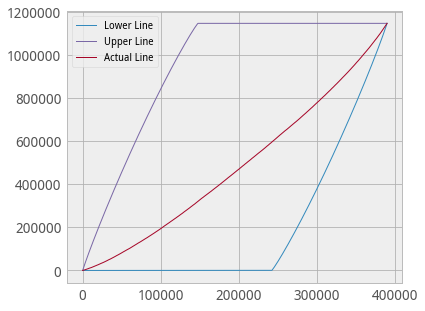

In [27]:
tm = time()
# cv = 5

# имитация xgboost
clf = lgb.LGBMRegressor(learning_rate=0.3, n_estimators=50, max_depth=4, subsample=0.8, colsample_bytree=0.8, nthread=-1)

cvp = cross_val_predict(estimator=clf, X=X, y=y, n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

figsize(6, 5)
df = {'pred': cvp,'test': y}
print ("Metric: ", hackathone_metric(df))
# 0.619490675267
# 0.619746131906 learning_rate=0.2

# 0.619224715858 - 0.618768309225

233.68027639389038
Metric:  0.618003737937


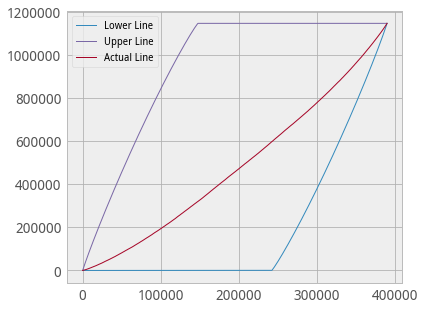

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,
                            criterion='mse', max_depth=None,
                            min_samples_split=200, min_samples_leaf=100,
                            min_weight_fraction_leaf=0.0,
                            max_features=20, max_leaf_nodes=None,
                            min_impurity_split=1e-07, bootstrap=True,
                            oob_score=False, n_jobs=-1, random_state=10, # None
                            verbose=0, warm_start=False)


tm = time()
#cv = 5

a_rf = cross_val_predict(estimator=rf, X=X, y=y, n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

figsize(6, 5)
df = {'pred': a_rf,'test': y}
print ("Metric: ", hackathone_metric(df))

# 0.61789219547 0.618003737937

In [31]:
cv

5

41.5311233997345
Metric:  0.611961390597


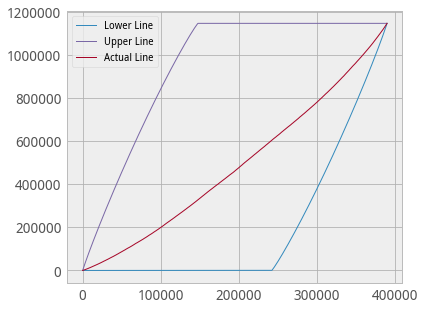

In [33]:
from xgboost import XGBRegressor


gbm = XGBRegressor(max_depth=4, learning_rate=0.1,
                   n_estimators=10, silent=True,
                   objective='reg:linear', gamma=0.6,
                   min_child_weight=5, max_delta_step=0,
                   subsample=0.8, colsample_bytree=0.8,
                   colsample_bylevel=1, reg_alpha=0,
                   reg_lambda=1, scale_pos_weight=1, base_score=0.5,
                   seed=1, missing=None, nthread=-1)


tm = time()
# cv = 5

a_gbm = cross_val_predict(estimator=gbm, X=X, y=y, n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

figsize(6, 5)
df = {'pred': a_gbm,'test': y}
print ("Metric: ", hackathone_metric(df))
# 0.612381394838 0.611961390597

(0.61, 0.6225)

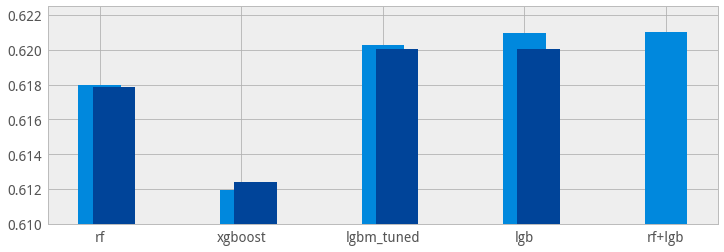

In [65]:
e_xgb = [0.612381394838, 0.611961390597]
e_rf = [0.61789219547, 0.618003737937]
e_lgb = [0.620026516158, 0.62094301361]
e_tunedlgb = [0.620036885673, 0.620268307369]


plt.figure(figsize=(12, 4))
plt.bar([1,2,3,4, 5], [e_rf[1], e_xgb[1], e_tunedlgb[1], e_lgb[1], 0.62105], color='#0088DD', width=0.3)
plt.bar(np.array([1,2,3,4])+0.1, [e_rf[0], e_xgb[0], e_tunedlgb[0], e_lgb[0]], width=0.3, color='#004499')
plt.xticks([1,2,3,4, 5], ['rf', 'xgboost', 'lgbm_tuned', 'lgb', 'rf+lgb'])
plt.ylim([0.61, 0.6225])

In [55]:
# смесь алгоритмов

lspace = np.linspace(0, 1, 20)
e1 = []
e2 = []
e3 = []

for alpha in lspace:
    e1.append(hackathone_metric({'pred': alpha * a_lgb + (1 - alpha) * a_rf,'test': y}, do_draw=False))
    e2.append(hackathone_metric({'pred': alpha * a_lgb + (1 - alpha) * a_gbm,'test': y}, do_draw=False))
    e3.append(hackathone_metric({'pred': alpha * a_gbm + (1 - alpha) * a_rf,'test': y}, do_draw=False))

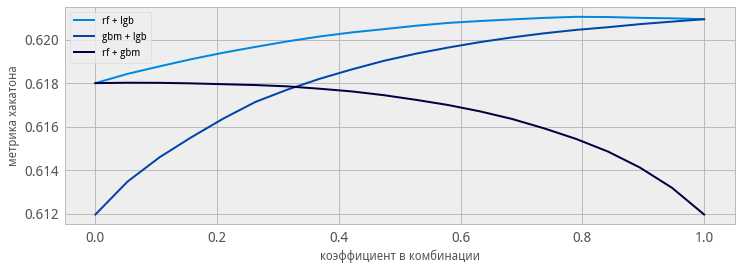

In [62]:
plt.figure(figsize=(12, 4))
plt.plot(lspace, e1, lw=2, color='#0088DD', label='rf + lgb')
plt.plot(lspace, e2, lw=2, color='#0044AA', label='gbm + lgb')
plt.plot(lspace, e3, lw=2, color='#000044', label='rf + gbm')
plt.legend()
plt.xlabel('коэффициент в комбинации')
plt.ylabel('метрика хакатона')

In [63]:
max(e1)

0.62105259128005375

2.7375810146331787
Metric:  0.605694410257


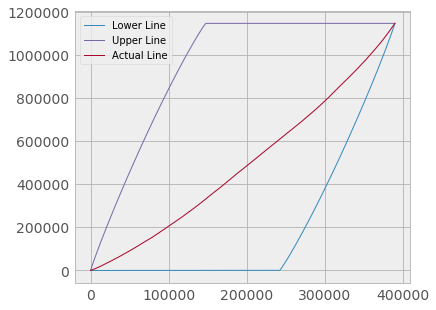

In [39]:
tm = time()
cv = 5
clf = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=50, nthread=-1)

cvp = cross_val_predict(estimator=clf, X=X[['AverageFriendsRegMonthDelta', 'MinRegDate']], y=y, n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

figsize(6, 5)
df = {'pred': cvp,'test': y}
print ("Metric: ", hackathone_metric(df))




In [43]:
clf.fit(X, y)

LGBMRegressor(boosting_type='gbdt', colsample_bytree=1, drop_rate=0.1,
       fair_c=1.0, gaussian_eta=1.0, huber_delta=1.0, learning_rate=0.1,
       max_bin=255, max_depth=-1, max_drop=50, min_child_samples=10,
       min_child_weight=5, min_split_gain=0, n_estimators=50, nthread=-1,
       num_leaves=31, objective='regression', poisson_max_delta_step=0.7,
       reg_alpha=0, reg_lambda=0, seed=0, silent=True, skip_drop=0.5,
       subsample=1, subsample_for_bin=50000, subsample_freq=1,
       uniform_drop=False, xgboost_dart_mode=False)

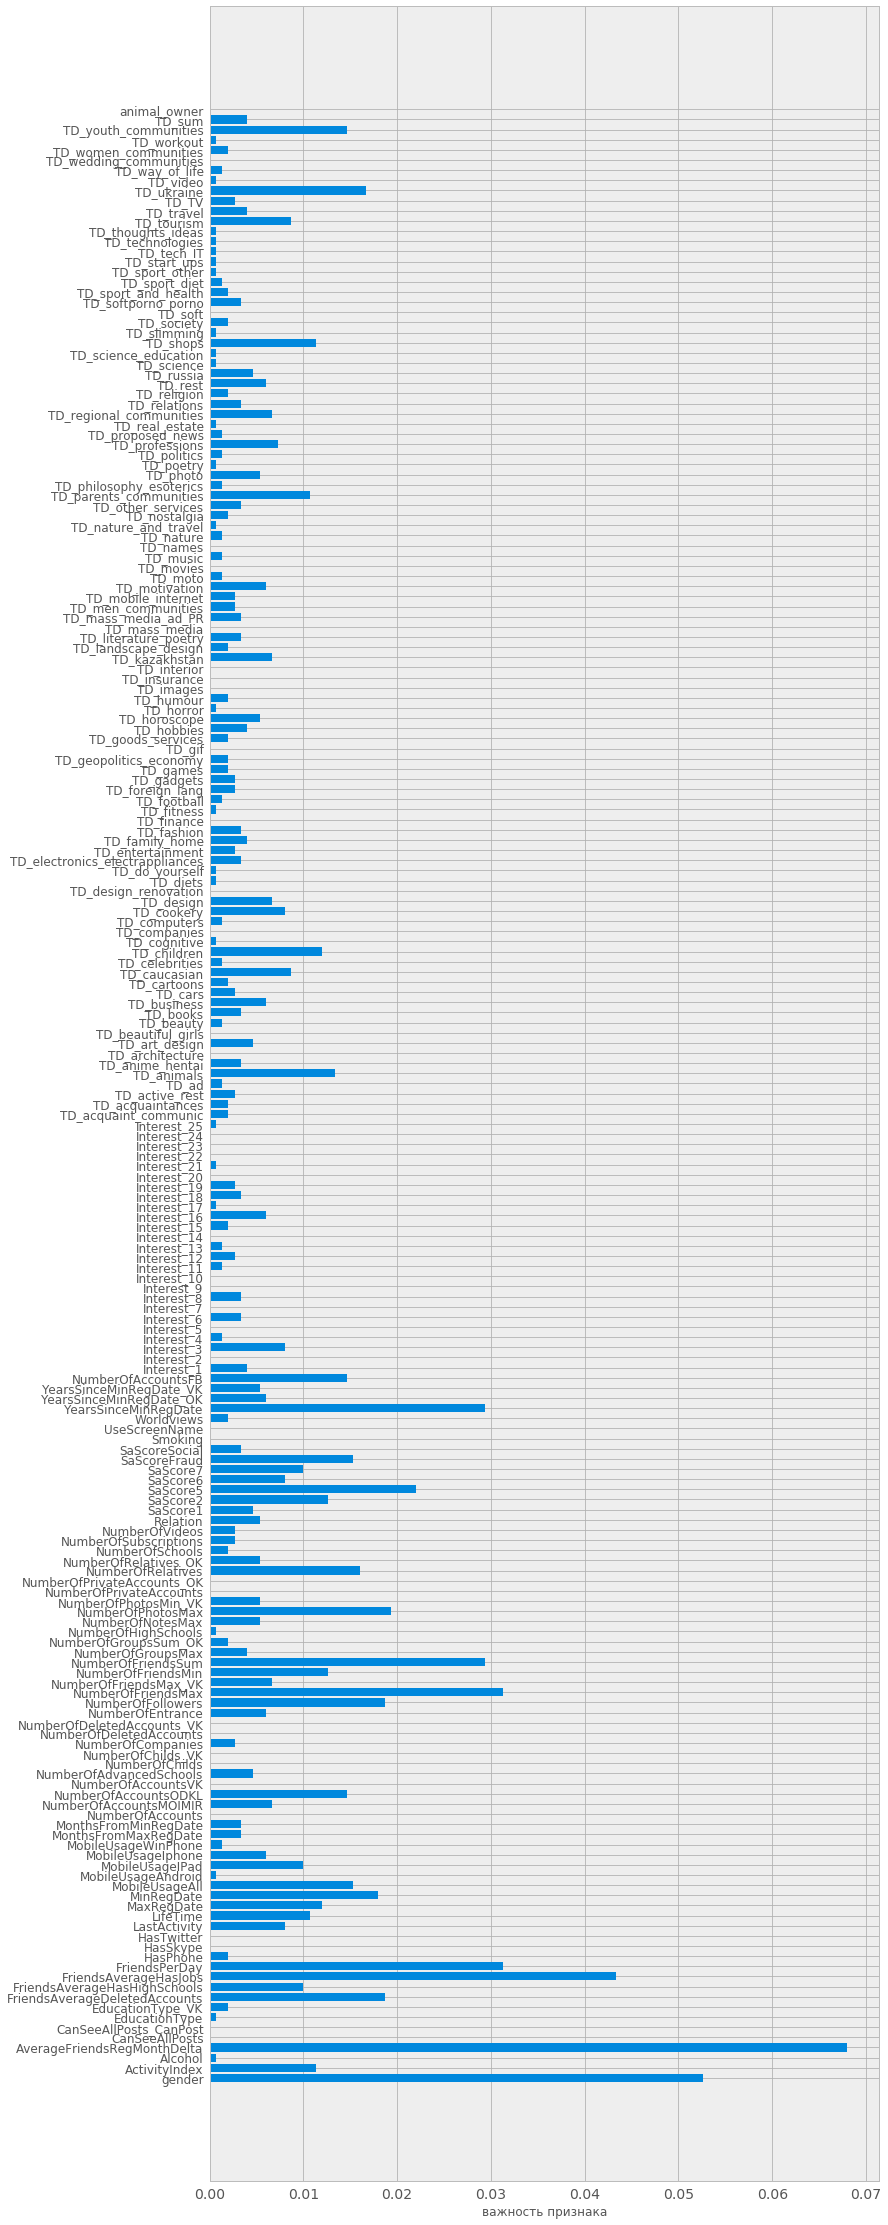

In [51]:
v = clf.feature_importances_
figure(figsize=(12, 40))
plt.barh(np.arange(len(v)), v, color='#0088DD')
plt.yticks(np.arange(len(v)), X.columns, rotation=0, fontsize=12)
plt.xlabel(u'важность признака')
plt.show()

In [ ]:
imp = sorted(imp.items(), key=lambda x: x[1])

v = [x[1] for x in imp]
k = [x[0] for x in imp]
#imp.values()
plt.barh(np.arange(len(v)), v, color='#000099')
plt.yticks(np.arange(len(v)), k, rotation=0, fontsize=12)
plt.xlabel(u'важность признака')
plt.show()

In [62]:
mean((X>0).mean(0) > 0.25)

0.23076923076923078

12.539789199829102
Metric:  0.619544190149


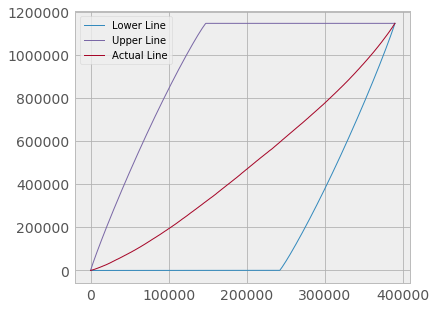

In [64]:
tm = time()
cv = 5
clf = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=50, nthread=-1)

cvp = cross_val_predict(estimator=clf, X=X[X.columns[(X>0).mean(0) > 0.25]], y=y, n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

figsize(6, 5)
df = {'pred': cvp,'test': y}
print ("Metric: ", hackathone_metric(df))

34.94797110557556
Metric:  0.59888099705


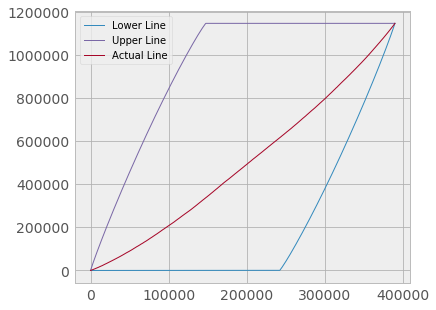

In [65]:
tm = time()
cv = 5
clf = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=50, nthread=-1)

cvp = cross_val_predict(estimator=clf, X=X[X.columns[(X>0).mean(0) <= 0.25]], y=y, n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

figsize(6, 5)
df = {'pred': cvp,'test': y}
print ("Metric: ", hackathone_metric(df))

43.57594633102417
Metric:  0.608520849963


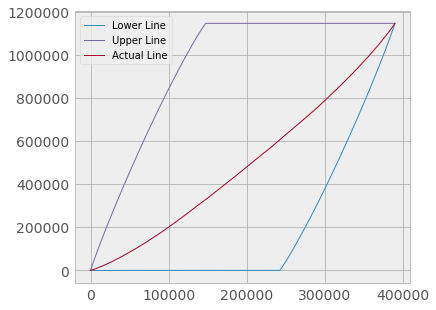

In [66]:
tm = time()
cv = 5
clf = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=50, nthread=-1)

cvp = cross_val_predict(estimator=clf, X=X[X.columns[(X>0).mean(0) <= 0.5]], y=y, n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

figsize(6, 5)
df = {'pred': cvp,'test': y}
print ("Metric: ", hackathone_metric(df))

## оптимизация параметров

In [73]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


random_state = 1

space = {
    'n_estimators': 50, # hp.quniform('n_estimators', 10, 10, 0),
    'learning_rate': hp.quniform('eta', 0.01, 0.5, 0.01),
    # A problem with max_depth casted to float instead of int with
    'max_depth':  hp.choice('max_depth', np.arange(2, 14, dtype=int)),
    'num_leaves': hp.choice('num_leaves', np.arange(2, 62, dtype=int)),
    'min_child_samples': hp.choice('min_child_samples', np.arange(1, 100, dtype=int)),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.1),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.1),
     }

def score(params):
    tm = time()
    #print("Training with params: ")
    #print(params)
    #num_round = int(params['n_estimators'])
    #del params['n_estimators']
    
    clf = lgb.LGBMRegressor(max_depth=params['max_depth'],
                            learning_rate=params['learning_rate'],
                            n_estimators=100, # n_estimators=params['n_estimators'] 
                            num_leaves=params['num_leaves'],
                            min_child_samples=params['min_child_samples'],
                            subsample=params['subsample'],
                            colsample_bytree=params['colsample_bytree'])

    
    a = cross_val_predict(estimator=clf, X=X, y=y, n_jobs=-1 ,cv=3, method='predict')
    
    df = {'pred': a,'test': y}
    score = hackathone_metric(df, do_draw=False)
    
    if (score > 0.621):
        print(params)
        print("\tScore =  {0} Time = {1}\n\n".format(score, time() - tm))
    
    return ( -score ) # т.к. минимум


trials = Trials()
    
best = fmin(score, space, algo=tpe.suggest, # trials=trials,
            max_evals=300)

{'num_leaves': 46, 'learning_rate': 0.07, 'max_depth': 13, 'colsample_bytree': 0.7000000000000001, 'n_estimators': 50, 'subsample': 0.7000000000000001, 'min_child_samples': 45}
	Score =  0.6212414668005066 Time = 32.76194643974304


{'num_leaves': 25, 'learning_rate': 0.08, 'max_depth': 13, 'colsample_bytree': 0.7000000000000001, 'n_estimators': 50, 'subsample': 0.6000000000000001, 'min_child_samples': 66}
	Score =  0.6210239326097324 Time = 26.475329160690308


{'num_leaves': 44, 'learning_rate': 0.08, 'max_depth': 13, 'colsample_bytree': 0.6000000000000001, 'n_estimators': 50, 'subsample': 0.8, 'min_child_samples': 37}
	Score =  0.6213500215401293 Time = 34.462475538253784


{'num_leaves': 44, 'learning_rate': 0.08, 'max_depth': 9, 'colsample_bytree': 0.5, 'n_estimators': 50, 'subsample': 0.8, 'min_child_samples': 11}
	Score =  0.6213584635394642 Time = 30.77764868736267


{'num_leaves': 36, 'learning_rate': 0.06, 'max_depth': 13, 'colsample_bytree': 0.8, 'n_estimators': 50, 'subsamp

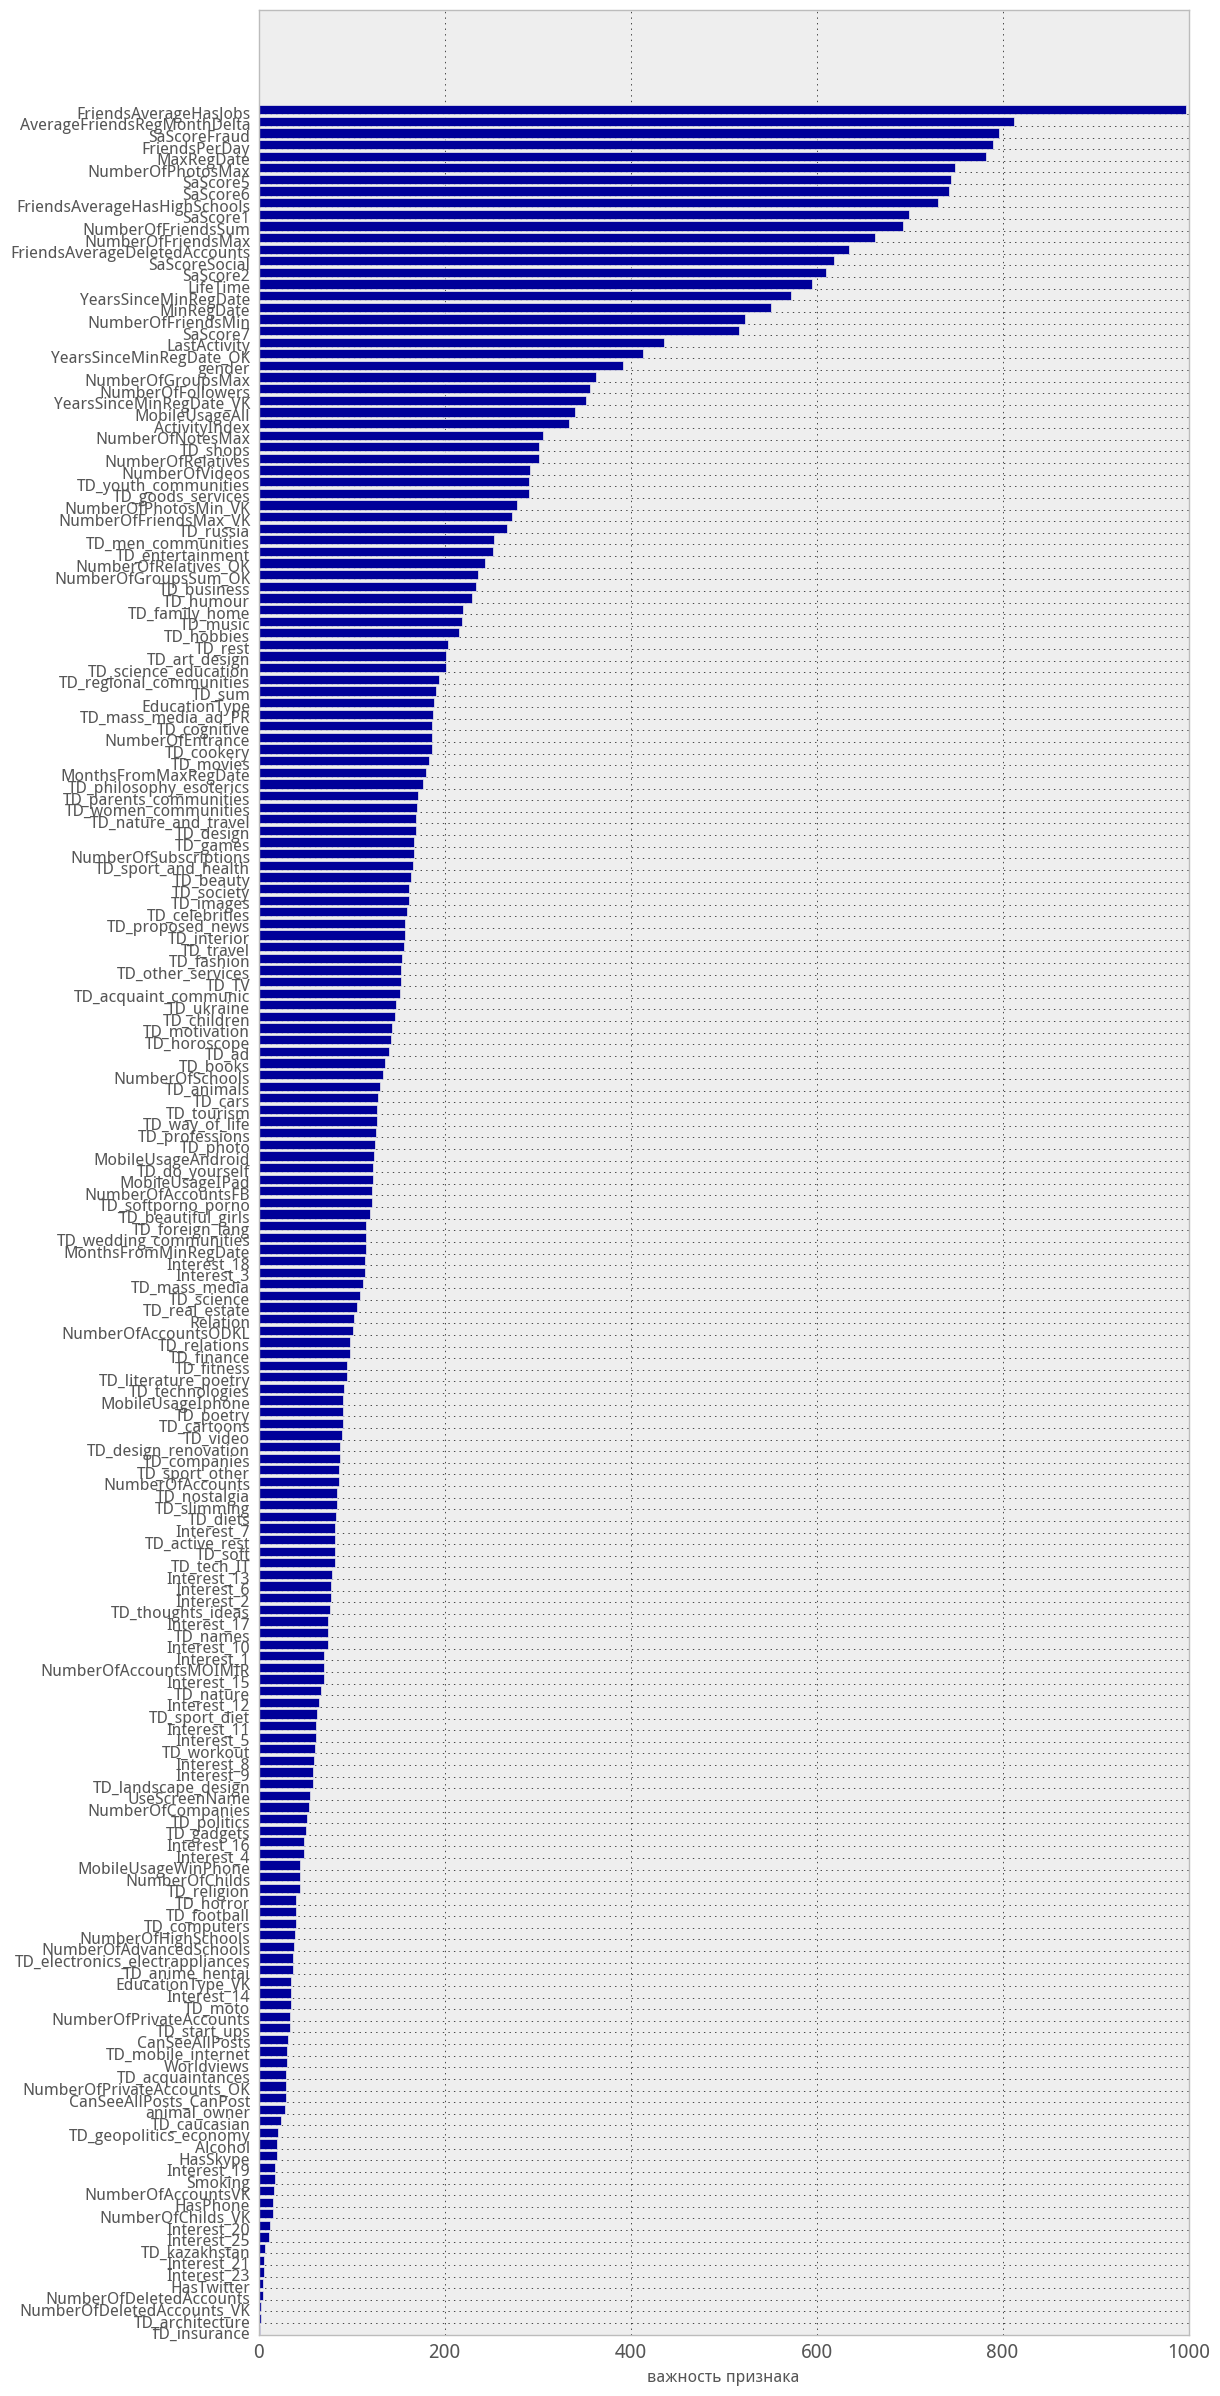

In [83]:
figsize(12, 30)
imp = clf.booster().get_fscore()
imp = sorted(imp.items(), key=lambda x: x[1])

v = [x[1] for x in imp]
k = [x[0] for x in imp]
#imp.values()
plt.barh(np.arange(len(v)), v, color='#000099')
plt.yticks(np.arange(len(v)), k, rotation=0, fontsize=12)
plt.xlabel(u'важность признака')
plt.show()


In [74]:
best



# 0.612690125729
# 0.614893275397
# 0.618805261162
# 0.621053597456 learning_rate=0.1

# 0.620026516158 - 0.62094301361

{'colsample_bytree': 0.7000000000000001,
 'eta': 0.06,
 'max_depth': 8,
 'min_child_samples': 76,
 'num_leaves': 46,
 'subsample': 1.0}

In [96]:
print (mean((X>0).mean(1)>0.34))


i = ((X>0).mean(1)>0.34)
i = i.values

0.210748717949


14.081033945083618
Metric:  0.658059162287


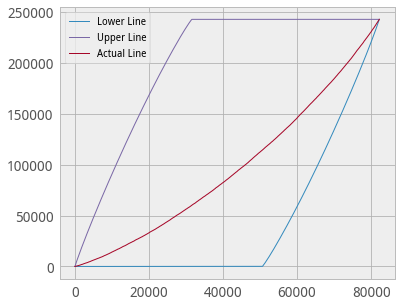

In [89]:
tm = time()
# cv = 5

# параметры по умолчанию
clf = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=50, nthread=-1)

a_lgb = cross_val_predict(estimator=clf, X=X.values[i,:], y=y[i], n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

figsize(6, 5)
df = {'pred': a_lgb,'test': y[i]}
print ("Metric: ", hackathone_metric(df))

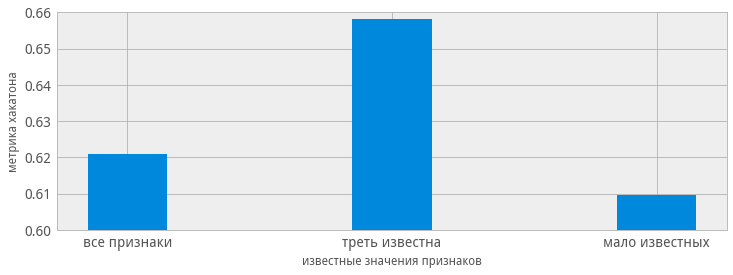

In [106]:
0.658059162287

0.609510921237

0.62094301361


plt.figure(figsize=(12, 4))
plt.bar([1,2,3], [0.62094301361, 0.658059162287, 0.609510921237], color='#0088DD', width=0.3)
#plt.bar(np.array([1,2,3,4])+0.1, [e_rf[0], e_xgb[0], e_tunedlgb[0], e_lgb[0]], width=0.3, color='#004499')
plt.xticks([1,2,3], ['все признаки', 'треть известна', 'мало известных'])
plt.xlabel('известные значения признаков')
plt.ylim([0.60, 0.66])
plt.ylabel('метрика хакатона')

In [102]:
print (mean((X>0).mean(0)>0.5))


i = ((X>0).mean(0)>0.5)
i = i.values

0.0974358974359


50.01448082923889
Metric:  0.62094301361


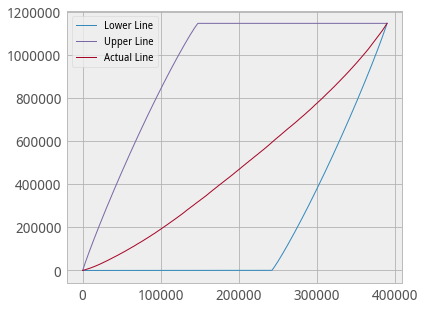

In [105]:
tm = time()
# cv = 5

# параметры по умолчанию
clf = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=50, nthread=-1)

a_lgb = cross_val_predict(estimator=clf, X=X.values, y=y, n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

figsize(6, 5)
df = {'pred': a_lgb,'test': y}
print ("Metric: ", hackathone_metric(df))

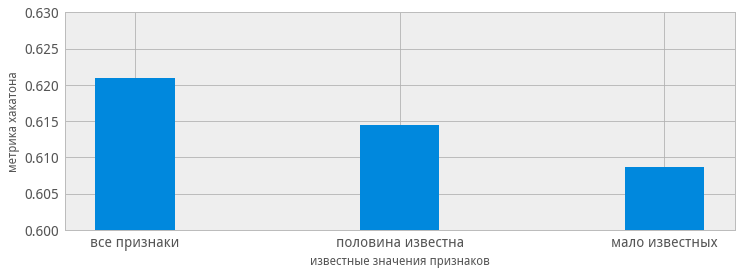

In [109]:




plt.figure(figsize=(12, 4))
plt.bar([1,2,3], [0.62094301361, 0.614487273913, 0.608630732257], color='#0088DD', width=0.3)
#plt.bar(np.array([1,2,3,4])+0.1, [e_rf[0], e_xgb[0], e_tunedlgb[0], e_lgb[0]], width=0.3, color='#004499')
plt.xticks([1,2,3], ['все признаки', 'половина известна', 'мало известных'])
plt.xlabel('известные значения признаков')
plt.ylim([0.60, 0.63])
plt.ylabel('метрика хакатона')

In [125]:
X.columns[-125:]

Index(['Interest_1', 'Interest_2', 'Interest_3', 'Interest_4', 'Interest_5',
       'Interest_6', 'Interest_7', 'Interest_8', 'Interest_9', 'Interest_10',
       ...
       'TD_TV', 'TD_ukraine', 'TD_video', 'TD_way_of_life',
       'TD_wedding_communities', 'TD_women_communities', 'TD_workout',
       'TD_youth_communities', 'TD_sum', 'animal_owner'],
      dtype='object', length=125)

34.66258788108826
Metric:  0.620519642468


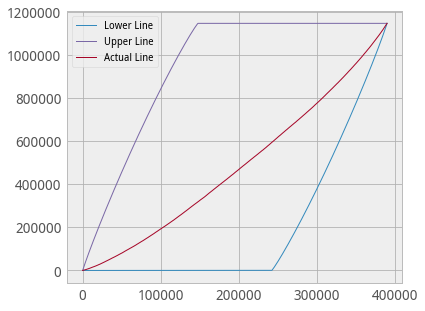

In [126]:
tm = time()
# cv = 5

# параметры по умолчанию
clf = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=50, nthread=-1)

a_lgb = cross_val_predict(estimator=clf, X=X.values[:,:125], y=y, n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

figsize(6, 5)
df = {'pred': a_lgb,'test': y}
print ("Metric: ", hackathone_metric(df))
# 0.620564728301

14.960119247436523
Metric:  0.535889606696


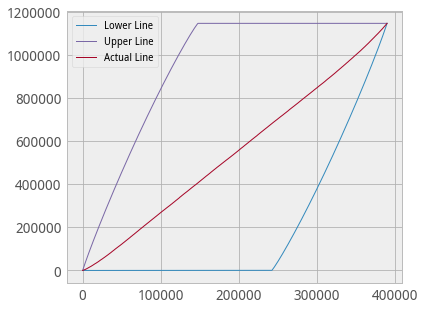

In [127]:
tm = time()
# cv = 5

# параметры по умолчанию
clf = lgb.LGBMRegressor(learning_rate=0.1, n_estimators=50, nthread=-1)

a_lgb = cross_val_predict(estimator=clf, X=X.values[:,125:], y=y, n_jobs=-1 ,cv=cv, method='predict')
print (time() - tm)

figsize(6, 5)
df = {'pred': a_lgb,'test': y}
print ("Metric: ", hackathone_metric(df))

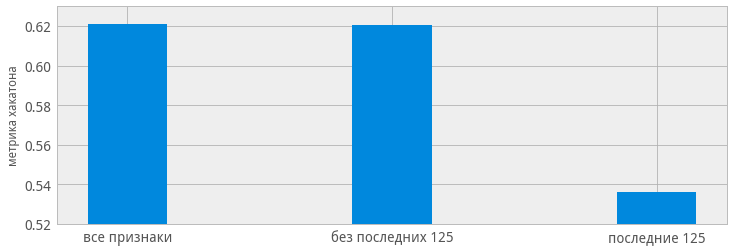

In [129]:
plt.figure(figsize=(12, 4))
plt.bar([1,2,3], [0.62094301361, 0.620519642468, 0.535889606696], color='#0088DD', width=0.3)
#plt.bar(np.array([1,2,3,4])+0.1, [e_rf[0], e_xgb[0], e_tunedlgb[0], e_lgb[0]], width=0.3, color='#004499')
plt.xticks([1,2,3], ['все признаки', 'без последних 125', 'последние 125'])
plt.ylim([0.52, 0.63])
plt.ylabel('метрика хакатона')